<a href="https://colab.research.google.com/github/Keithleezx123/DSL/blob/main/Copy_of_eda4u_dsl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

You need to run the above setup everytime you login to the Colab, if you want to run this online EDA.

## Test Test

### %%print_verilog

Using %%print_verilog, the schematic of the Verilog HDL design can be generated for reference.

Installing. Please wait... done!


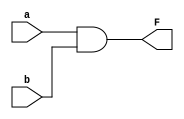

In [ ]:
%%print_verilog

//--my 2 inputs and gate--//
module my_and2(
    output F,
    input a,
    input b);

  assign F = (a&b);

endmodule
//-----//

## %%verilog

Most of the time, only need to use %%verilog to simulate the Verilog module, with Testbench.
The modules, and testbench must be included in the same Cell. The above Cell that include the adder module is not seen in the below Cell, thus the adder module is again included in the below cell.

If you include testbench:
1. You should only use %%verilog, but not %%print_verilog. Otherwise there will be syntax error;
1. You must include $finish; in the testbench. Otherwise, the Cell will be runing the simulation and non-stop;

In [ ]:
%%verilog

//--my 2 inputs and gate--//
module my_and2 (
    output F,
    input a,
    input b);

  assign F = (a&b);

endmodule
//-----//

//-----//
module my_add2_tb();
    wire F_tb;
    reg a_tb, b_tb;

    my_and2 dut(.F(F_tb),.a(a_tb),.b(b_tb));

    // Test stimulus
    initial begin
        $dumpfile("my_add2_tb.vcd");
        $dumpvars;

        #0 a_tb = 1'b0; b_tb = 1'b0;
        #1 a_tb = 1'b0; b_tb = 1'b1;
        #1 a_tb = 1'b1; b_tb = 1'b0;
        #1 a_tb = 1'b1; b_tb = 1'b1;
        #1 $finish;

        $dumpoff;
    end

endmodule


VCD info: dumpfile my_add2_tb.vcd opened for output.



## %%waveform

You can choose to plot the waveform using %%waveform, where it will take the saved file from above Cell, c_cra.vcd, to plot the waveform. The file name must be specificed in the above Cell.

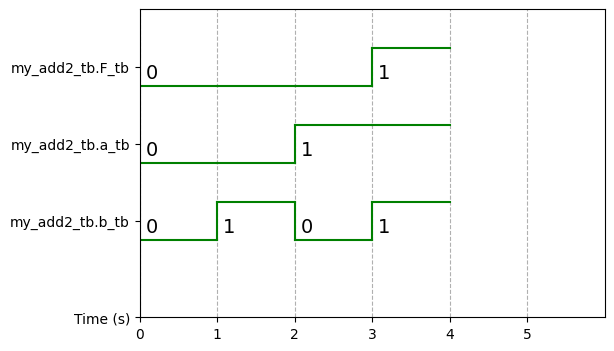

In [ ]:
%%waveform my_add2_tb.vcd
sign_list = ['my_add2_tb.F_tb','my_add2_tb.a_tb', 'my_add2_tb.b_tb']
time_begin = 0
time_end = 5
base = 'dec' # bin, dec, dec2, hex, octal

##Exercise
Copy the above Verilog module and Testbench, modify the codes to evaluate NAND, OR, NOR, XOR, XNOR.

You can try to ask Gemini, "what is the boolean expressins in Verilog HDL for AND, NAND, OR, NOR, XOR, XNOR"

In [ ]:
%%verilog

//--my 2 inputs or gate--//
module my_and2 (
    output F,
    input a,
    input b);

  assign F = (a ~|b);

endmodule
//-----//

//-----//
module my_add2_tb();
    wire F_tb;
    reg a_tb, b_tb;

    my_and2 dut(.F(F_tb),.a(a_tb),.b(b_tb));

    // Test stimulus
    initial begin
        $dumpfile("my_add2_tb.vcd");
        $dumpvars;

        #0 a_tb = 1'b0; b_tb = 1'b0;
        #1 a_tb = 1'b0; b_tb = 1'b1;
        #1 a_tb = 1'b1; b_tb = 1'b0;
        #1 a_tb = 1'b1; b_tb = 1'b1;
        #1 $finish;

        $dumpoff;
    end

endmodule


VCD info: dumpfile my_add2_tb.vcd opened for output.



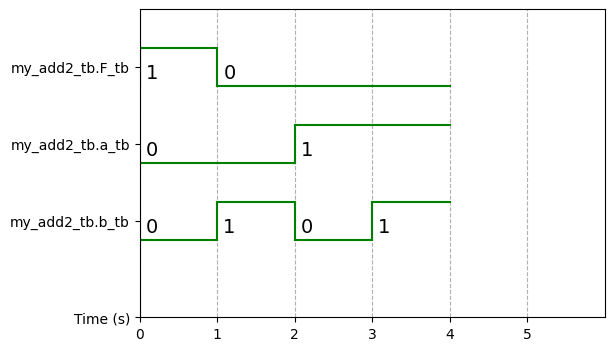

In [ ]:
%%waveform my_add2_tb.vcd
sign_list = ['my_add2_tb.F_tb','my_add2_tb.a_tb', 'my_add2_tb.b_tb']
time_begin = 0
time_end = 5
base = 'dec' # bin, dec, dec2, hex, octal